<a href="https://colab.research.google.com/github/JillTCLin/Parcel-Service-Project/blob/master/Seattle_house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import the libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load and explore the dataset**

In [ ]:
#load the dataset
data = pd.read_csv("Seattle.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
#data overview and summary
data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590,sqft,6000.00,sqft,98144,795000
1,4,2.0,2240,sqft,0.31,acre,98106,915000
2,4,3.0,2040,sqft,3783.00,sqft,98107,950000
3,4,3.0,3800,sqft,5175.00,sqft,98199,1950000
4,2,2.0,1042,sqft,NaN,NaN,98102,950000
...,...,...,...,...,...,...,...,...
2516,5,4.5,5580,sqft,0.30,acre,98146,3800000
2517,3,2.5,1390,sqft,1570.00,sqft,98126,575000
2518,3,2.5,2950,sqft,0.47,acre,98118,3105000
2519,5,5.0,3010,sqft,4887.00,sqft,98115,1807000


In [ ]:
data.info()
print("\n")
data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2521 entries, 0 to 2520
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2521 non-null   int64  
 1   baths           2521 non-null   float64
 2   size            2521 non-null   int64  
 3   size_units      2521 non-null   object 
 4   lot_size        2097 non-null   float64
 5   lot_size_units  2097 non-null   object 
 6   zip_code        2521 non-null   int64  
 7   price           2521 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 157.7+ KB




,count,mean,std,min,25%,50%,75%,max
beds,2521.0,2.877033,1.247518,1.00,2.0,3.0,4.0,15.0
baths,2521.0,2.171956,1.004397,0.50,1.5,2.0,2.5,9.0
size,2521.0,1758.998017,921.608036,250.00,1086.0,1580.0,2270.0,11010.0
lot_size,2097.0,3896.245794,2714.651578,0.23,1263.0,4001.0,6000.0,9998.0
zip_code,2521.0,98123.984927,23.118736,98101.00,98108.0,98117.0,98126.0,98199.0
price,2521.0,966821.676319,887011.065516,159000.00,605000.0,813000.0,1115000.0,25000000.0


In [ ]:
data['baths'] = data['baths'].astype('int64')

## Performance of raw data

In [ ]:
d0 = data[['size', 'price']]
X = d0.iloc[:, :-1].values
y = d0.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Model_0: simple linear regression with raw data

model_0 = LinearRegression()
model_0.fit(X_train, y_train)
y_pred_0 = model_0.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_0))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_0))

#Calculate the R2 score by using the predicted and actual prices
print('R² score: ', r2_score(y_test,y_pred_0))

MAE: 284651.3467050522
MSE: 1279373166942.5896
R² score:  0.14475742535070535


# **Prepare and clean the data**

## Analyze data

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'baths'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'lot_size'}>],
       [<Axes: title={'center': 'zip_code'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

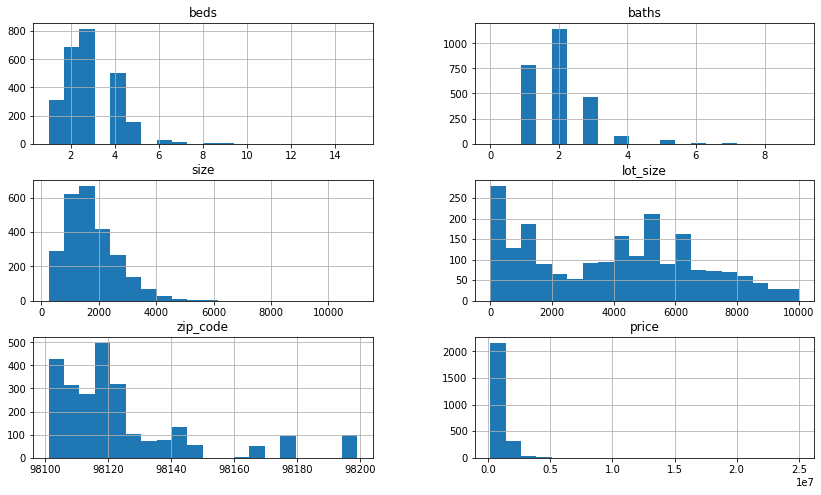

In [ ]:
#visualize the distribution of numerical data by histogram
data.hist(figsize=(14,8), bins=20)

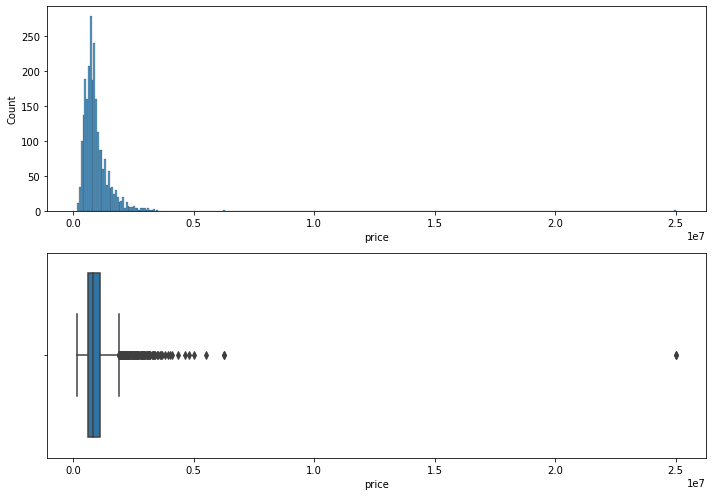

In [ ]:
#visualize price in the raw data
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.histplot(data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(x=data['price'])
plt.tight_layout()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='lot_size', ylabel='price'>

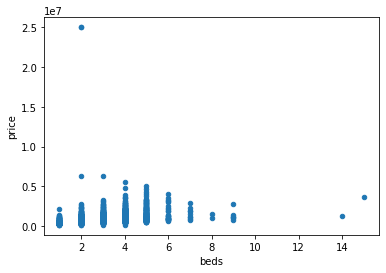

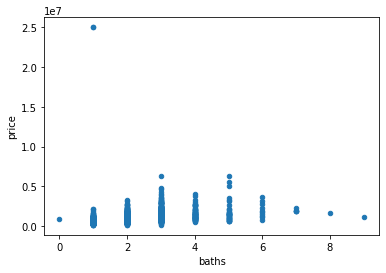

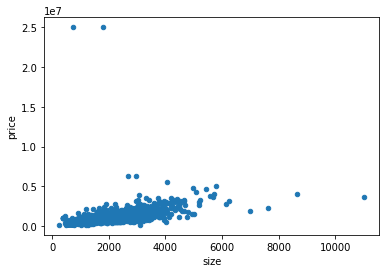

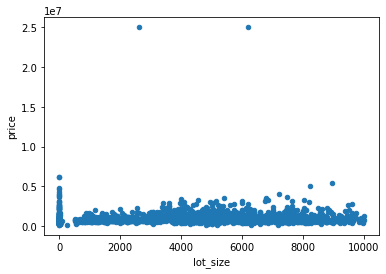

In [ ]:
data.plot.scatter(x='beds',y='price')
data.plot.scatter(x='baths',y='price')
data.plot.scatter(x='size',y='price')
data.plot.scatter(x='lot_size',y='price')

## Outliers

In [ ]:
#https://www.youtube.com/watch?v=Vc4cXIAa69Y
#IQR method: use interquartile range to detect outliers
#define a function called "outliers" which returns a list of index of outliers
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  list = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]

  return list

In [ ]:
#create an empty list to store the output indices from multiple columns

index_list = []
for feature in ['price']:  #'beds', 'baths', 'size','lot_size'
  index_list.extend(outliers(data,feature))

In [ ]:
#define a fuction called "remove" which returns a cleaned dataset without outliers

def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
d1 = remove(data,index_list)

In [ ]:
print ("Shape Of The Before Ouliers: ",data.shape)
print ("Shape Of The After Ouliers: ",d1.shape)

Shape Of The Before Ouliers:  (2521, 8)
Shape Of The After Ouliers:  (2374, 8)


## Missing data

In [ ]:
#find the sum of missing values
d1.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          417
lot_size_units    417
zip_code            0
price               0
dtype: int64

In [ ]:
#fill NaN values with size value, assumed min lot size is equal to house size
d1['lot_size'] = d1['lot_size'].fillna((d1['size'].mean()))

## Uniform mearsurement of lot size

In [ ]:
#count numbers of acre and sqft in the lot_size_units
print(d1.groupby(['lot_size_units']).size())

lot_size_units
acre     251
sqft    1706
dtype: int64


In [ ]:
#convert value of acre to square feet in the lot_size column
d1.loc[d1['lot_size_units'] == 'acre', 'lot_size'] = d1[d1['lot_size_units'] == 'acre'] ['lot_size']*43560

In [ ]:
#unify the units of lot size in the lot_size_units column
d1.loc[d1['lot_size_units'] == 'acre', 'lot_size_units'] = 'sqft'
d1['lot_size_units'] = d1['lot_size_units'].fillna('sqft')

d1.isnull().sum()

beds              0
baths             0
size              0
size_units        0
lot_size          0
lot_size_units    0
zip_code          0
price             0
dtype: int64

In [ ]:
d1 = d1.reset_index(drop=True)

In [ ]:
d1['lot_size'] = d1['lot_size'].astype('int64')

## **Find the correlation of each column in the dataset**

In [ ]:
data.corr()

,beds,baths,size,lot_size,zip_code,price
beds,1.000000,0.649864,0.770757,0.279501,0.081527,0.316855
baths,0.649864,1.000000,0.645223,0.060997,0.009402,0.322530
size,0.770757,0.645223,1.000000,0.263893,0.087106,0.476061
lot_size,0.279501,0.060997,0.263893,1.000000,0.148520,0.084253
zip_code,0.081527,0.009402,0.087106,0.148520,1.000000,-0.031812
price,0.316855,0.322530,0.476061,0.084253,-0.031812,1.000000


In [ ]:
d1.corr()

,beds,baths,size,lot_size,zip_code,price
beds,1.000000,0.621962,0.766314,-0.045585,0.093437,0.544246
baths,0.621962,1.000000,0.609118,-0.029204,0.015646,0.523512
size,0.766314,0.609118,1.000000,-0.034014,0.106725,0.722842
lot_size,-0.045585,-0.029204,-0.034014,1.000000,-0.009657,-0.036137
zip_code,0.093437,0.015646,0.106725,-0.009657,1.000000,-0.013368
price,0.544246,0.523512,0.722842,-0.036137,-0.013368,1.000000


<Axes: >

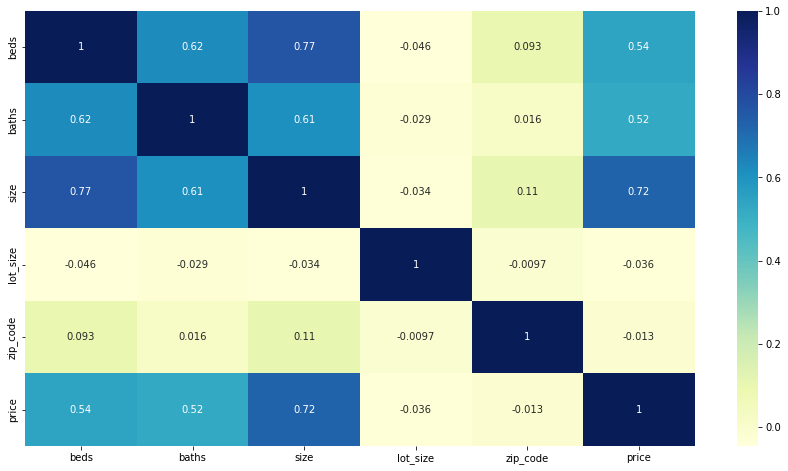

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(d1.corr(),annot=True, cmap='YlGnBu')

# **Simple Linear Regression - Model 1**


In [ ]:
#select size as independent variable input
d2 = d1[['size', 'price']]

X = d2.iloc[:, :-1].values
y = d2.iloc[:, -1].values

In [ ]:
# Split the dataset into the Train set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((1899, 1), (1899,))

In [ ]:
# Train the model and predict the test set results.
# Model_1: simple linear regression with processed data

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Predict the Test set results
y_pred_1 = model_1.predict(X_test)


# **Multiple  Linear Regression - Mode 2**


In [ ]:
#select bed, baths, abd size as independent variable input
d3 = d1[['beds','baths','size','price']]

X = d3.iloc[:, :-1].values
y = d3.iloc[:, -1].values

In [ ]:
# Split the dataset into the Train set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((1899, 3), (1899,))

In [ ]:
# Train the model and predict the test set results
# Model_2: multiple linear regression with processed data

model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Predict the Test set results
y_pred_2 = model_2.predict(X_test)

#**Evaluate the model performance**

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_1))
#Calculate the R2 score by using the predicted and actual fare prices
print('R² score: ', r2_score(y_test,y_pred_1))

NameError: ignored

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_2))
#Calculate the R2 score by using the predicted and actual fare prices
print('R² score: ', r2_score(y_test,y_pred_2))

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred_1)
sns.distplot(residuals)

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred_2)
sns.distplot(residuals)

# Simple linear regression - Model 3







In [ ]:
#load the dataset
data = pd.read_csv("Seattle2.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

d4 = data[['size', 'price']]
X = d4.iloc[:, :-1].values
y = d4.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Model_3: simple linear regression

model_3 = LinearRegression()
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_3))

#Calculate the R2 score by using the predicted and actual prices
print('R² score: ', r2_score(y_test,y_pred_3))

MAE: 230999.20856797058
MSE: 127036395644.48947
R² score:  0.6158580483105964


<ipython-input-60-4c845a3083ed>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

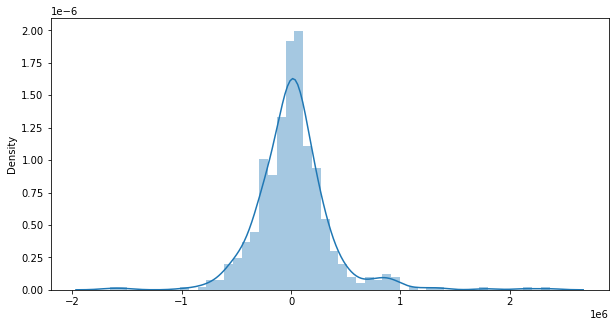

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred_3)
sns.distplot(residuals)

# Multiple linear regression - Model 4




In [ ]:
#load the dataset
data = pd.read_csv("Seattle2.csv")

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

d5 = data[['beds','baths','size','price']]
X = d5.iloc[:, :-1].values
y = d5.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Model_4: multiple linear regression

model_4 = LinearRegression()
model_4.fit(X_train, y_train)
y_pred_4 = model_4.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_4))

#Calculate the R2 score by using the predicted and actual prices
print('R² score: ', r2_score(y_test,y_pred_4))

MAE: 224070.3287055065
MSE: 114721506381.55576
R² score:  0.6530967118628982


<ipython-input-61-6a15751b6d00>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

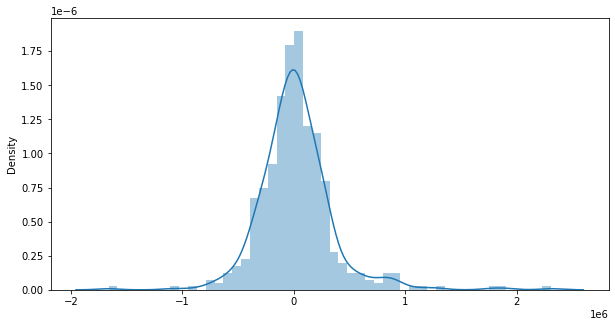

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred_4)
sns.distplot(residuals)

# **House price prediction Tool**

In [ ]:
input_size = int(input("Please enter the square feet(number between 100 to 5000) of the house: "))

price = input_size * model_3.coef_ + model_3.intercept_
print("The esitimate price is", price)

Please enter the square feet(number between 100 to 5000) of the house: 1000
The esitimate price is [580969.02613691]


In [ ]:
'''
input_bed = int(input("Please enter the number of bed of the house(bwtween 1 to 10): "))
input_bath = int(input("Please enter the number of bath of the house(bwtween 1 to 10): "))
input_size = int(input("Please enter the square feet(number between 100 to 5000) of the house: "))

price = model_4.predict([[input_bed,input_bath,input_size]])

print("The esitimate price is", price)
'''

Please enter the number of bed of the house(bwtween 1 to 10): 2
Please enter the number of bath of the house(bwtween 1 to 10): 2
Please enter the square feet(number between 100 to 5000) of the house: 1000
The esitimate price is [631008.54187437]
